## Data import

In [419]:
# import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# import ML tools
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score

In [420]:
# expanding the view
pd.set_option('display.max_columns', 100) 
pd.set_option('display.max_rows', 100)

In [421]:
# create the dataframe
df = pd.read_csv('listings.csv')

## EDA

In [422]:
# initial view of data
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.636289,-122.371025,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,98119,Seattle,"Seattle, WA",US,United States,47.639123,-122.365666,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazi

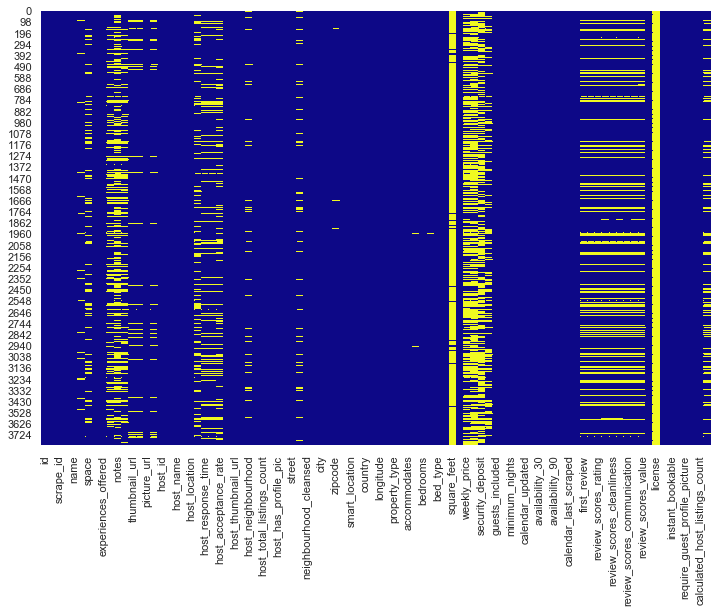

In [423]:
# visualizing the null values:
fig, ax = plt.subplots(figsize=(12,8))
ax = sns.heatmap(df.isnull(), cbar=False, cmap='plasma')


In [424]:
# what does the price column look like?
df.price.values

array(['$85.00', '$150.00', '$975.00', ..., '$93.00', '$99.00', '$87.00'],
      dtype=object)

In [425]:
# extracting out the int value of the price column
df.price = df.price.str.extract('(\d+)')

# turn the price into integer
df.price = df.price.astype(int)
df.price.dtype

dtype('int32')

In [426]:
# starting off by checking the correlations to price to get a birds-eye view
abs(df.corr().price.sort_values()).sort_values(ascending=False) 

price                             1.000000
accommodates                      0.659205
bedrooms                          0.633074
beds                              0.596038
square_feet                       0.531752
bathrooms                         0.524024
guests_included                   0.399172
reviews_per_month                 0.217938
number_of_reviews                 0.124564
longitude                         0.105669
host_total_listings_count         0.095740
host_listings_count               0.095740
review_scores_location            0.085292
availability_90                   0.061674
calculated_host_listings_count    0.053782
review_scores_rating              0.053440
review_scores_cleanliness         0.053186
availability_60                   0.051973
host_id                           0.048908
id                                0.046135
review_scores_value               0.044998
availability_30                   0.039610
availability_365                  0.018361
minimum_nig

In [427]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 3818 rows and 92 columns


## Data preparation

In [428]:
# I will filter the columns that I find relevant for my analysis (square_feet has way too many NaNs):
cols = ['price', 'accommodates', 'host_is_superhost', 'host_total_listings_count', 
        'neighbourhood_group_cleansed', 'latitude', 'longitude', 'property_type', 'room_type', 
        'bathrooms', 'bedrooms', 'beds', 'minimum_nights', 'maximum_nights', 
        'availability_90', 'number_of_reviews', 'review_scores_rating', 'instant_bookable', 
        'guests_included']
len(cols)

19

In [429]:
# setting the new dataframe to just the selected columns
df = df[cols] 

I'm only interested in listings where the renter gets the entire place for themselves:

In [430]:
# filtering out shared listings
df = df[df.room_type == 'Entire home/apt']

In [431]:
print(f"This dataset has {df.shape[0]} rows and {df.shape[1]} columns")

This dataset has 2541 rows and 19 columns


#### Let's take a look at missing values

In [432]:
# we have a fairly high number of NaNs in the review_scores_rating column
df.isna().sum() 

price                             0
accommodates                      0
host_is_superhost                 2
host_total_listings_count         2
neighbourhood_group_cleansed      0
latitude                          0
longitude                         0
property_type                     1
room_type                         0
bathrooms                         9
bedrooms                          6
beds                              0
minimum_nights                    0
maximum_nights                    0
availability_90                   0
number_of_reviews                 0
review_scores_rating            416
instant_bookable                  0
guests_included                   0
dtype: int64

#### Missing values:
*Something needs to be done with the 'review_scores_rating' missing values. They are a fairly large portion of the dataset. One could argue that dropping them is prudent, or just to find some proxy for these values. 
After giving it some thought, I decided to impute these missing values with the mean review score of the neighbourhood they are located in. I'm aware of the drawbacks of relying on neighbourhood rating only, but in the choice between imputing with the renters other listings vs their respective neighbourhood, I will assume that there is a larger spread between a renters listings than between listings in the same neighbourhood.*

*Also, since most hosts only have listing I would not be able to fill all these missing values. So after all, I believe my imputation method is ok given the data. Dropping them is fine as well, but I think the neighbourhood is a decent proxy.*

In [433]:
# create a dictionary for each neighbourhood's mean review score
neigh_group_means = df.groupby('neighbourhood_group_cleansed').review_scores_rating.mean().to_dict()
neigh_group_means 

{'Ballard': 95.64285714285714,
 'Beacon Hill': 92.68,
 'Capitol Hill': 94.24451410658307,
 'Cascade': 93.55319148936171,
 'Central Area': 96.14948453608247,
 'Delridge': 95.43243243243244,
 'Downtown': 93.86104218362283,
 'Interbay': 93.0,
 'Lake City': 96.28571428571429,
 'Magnolia': 94.3125,
 'Northgate': 94.82352941176471,
 'Other neighborhoods': 94.92118226600985,
 'Queen Anne': 95.38020833333333,
 'Rainier Valley': 93.31746031746032,
 'Seward Park': 94.43478260869566,
 'University District': 86.39682539682539,
 'West Seattle': 95.68571428571428}

In [434]:
# reformat to 1 decimal
for k, v in neigh_group_means.items():
    neigh_group_means[k] = round(neigh_group_means[k], 1)
neigh_group_means.values()

dict_values([95.6, 92.7, 94.2, 93.6, 96.1, 95.4, 93.9, 93.0, 96.3, 94.3, 94.8, 94.9, 95.4, 93.3, 94.4, 86.4, 95.7])

In [435]:
# for my own visualization
df[df.review_scores_rating.isna()][['review_scores_rating', 'neighbourhood_group_cleansed']].head()

,review_scores_rating,neighbourhood_group_cleansed
3,NaN,Queen Anne
26,NaN,Queen Anne
46,NaN,Queen Anne
51,NaN,Queen Anne
54,NaN,Queen Anne


In [436]:
# imputing the missing values with the mean values from the dictionary created above (neigh_group_means)
df.review_scores_rating = df.review_scores_rating.fillna(df.neighbourhood_group_cleansed.map(neigh_group_means))

# no more missing values
df.review_scores_rating.isna().any() 

False

In [437]:
# any other missing values?
df.isna().sum()

price                           0
accommodates                    0
host_is_superhost               2
host_total_listings_count       2
neighbourhood_group_cleansed    0
latitude                        0
longitude                       0
property_type                   1
room_type                       0
bathrooms                       9
bedrooms                        6
beds                            0
minimum_nights                  0
maximum_nights                  0
availability_90                 0
number_of_reviews               0
review_scores_rating            0
instant_bookable                0
guests_included                 0
dtype: int64

Not many missing values remaining. We can drop these without any worries

In [438]:
# drop the remaining missing values
df.dropna(inplace=True)

## Analysis and modelling

#### Part 1: What are the prices and how many listings are there for different neighbourhoods of Seattle?

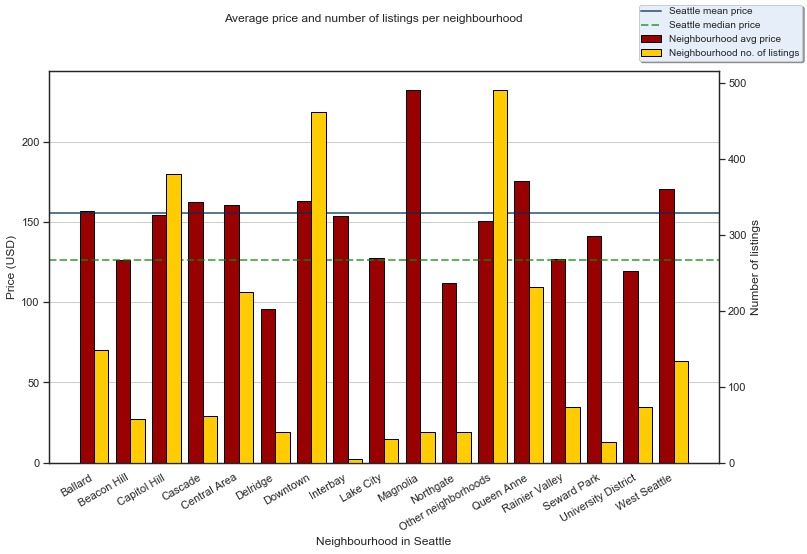

In [439]:
# mean and median for the horizontal lines
mean_price = df.price.mean()
median_price = df.price.median()

# variables
labels = df.groupby('neighbourhood_group_cleansed').price.mean().index
y = df.groupby('neighbourhood_group_cleansed').price.mean().values
z = df.groupby('neighbourhood_group_cleansed').size()
x = np.arange(len(labels))
width = 0.4

# plot 
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Average price and number of listings per neighbourhood')


# ax.bar(x, y, edgecolor='#e1fd00')
ax2 = ax.twinx()
# ax2.plot(x, z, c='red')

# bars next to each other
rects1 = ax.bar(x - width/2, y, width, color='#990000', edgecolor='black', label='Neighbourhood avg price')
rects2 = ax2.bar(x + width/2, z, width, color='#ffcc00', edgecolor='black', label='Neighbourhood no. of listings')

# set ticks
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.set_xticks

# set labels
ax.set_ylabel('Price (USD)')
ax2.set_ylabel('Number of listings')
ax.set_xlabel('Neighbourhood in Seattle')

# horizontal lines
ax.axhline(mean_price, c='#052f58', label='Seattle mean price', linestyle='solid', linewidth=2, alpha=0.65)
ax.axhline(median_price, c='#069000', label='Seattle median price', linestyle='dashed', linewidth=2, alpha=0.65)

# grid and legend
ax.grid(axis='y')
fig.legend(loc='upper right', frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)


# fixing the xticks layout
fig.autofmt_xdate()

plt.savefig('part1.png')

#### Part 2: What would a price optimizing person or family choose in Seattle? 


In [440]:
# we are looking for the cheapest price per bed, creating that column
df['price_per_bed'] = df.price / df.beds 

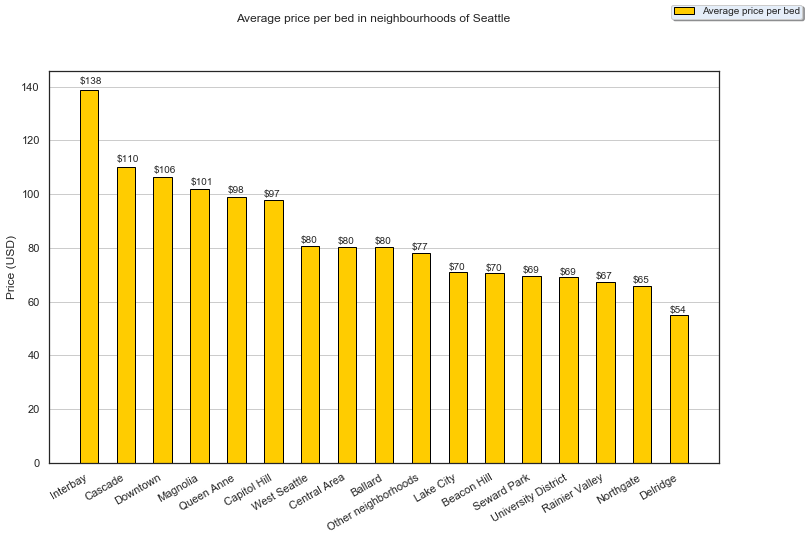

In [441]:
# variables
x = df.groupby('neighbourhood_group_cleansed').price_per_bed.mean().sort_values(ascending=False).index
y = df.groupby('neighbourhood_group_cleansed').price_per_bed.mean().sort_values(ascending=False).values

# plot
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle('Average price per bed in neighbourhoods of Seattle')

# bars
ax.bar(x, y, color='#ffcc00', edgecolor='black', width=0.5, label='Average price per bed')
ax.set_ylabel('Price (USD)')

# grid and legend

ax.grid(axis='y')
fig.legend(frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)

# annotate
for p in ax.patches:
    ax.annotate('$'+str(int(p.get_height())), (p.get_x() * 1.0, p.get_height() * 1.015))

# fixing the xticks layout
fig.autofmt_xdate()

plt.savefig('part2.png')

#### Part 3: Machine learning (preparation)

In [442]:
# creating a new dataset for ML since I will be adding a lot of columns and want to keep the original clean
dfml = df.copy()

# dropping the price_per_bed variable I created as it includes the data we are targetting, 
# thus ruining the prediction
dfml.drop(columns=['price_per_bed'], inplace=True)

In [443]:
dfml.dtypes

price                             int32
accommodates                      int64
host_is_superhost                object
host_total_listings_count       float64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_type                    object
room_type                        object
bathrooms                       float64
bedrooms                        float64
beds                            float64
minimum_nights                    int64
maximum_nights                    int64
availability_90                   int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                 object
guests_included                   int64
dtype: object

Let's see what the numerical varibles have as correlations, I will do a heatmap of the correlations to see how they look

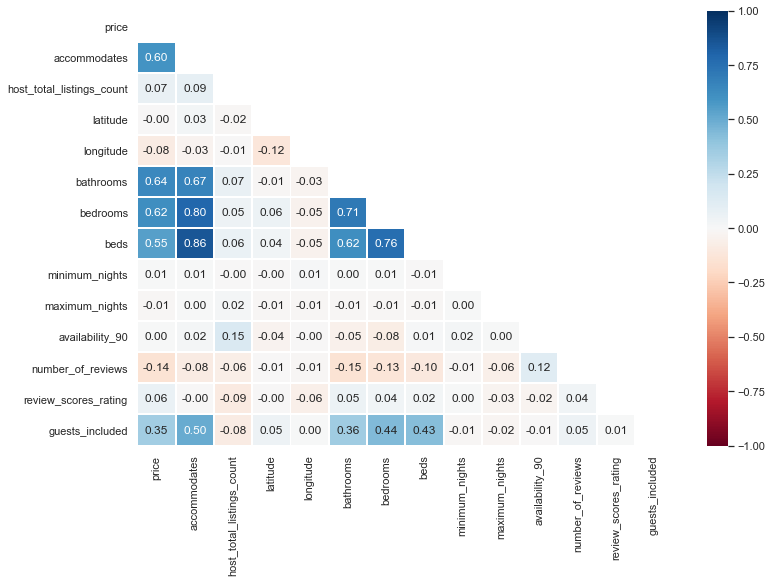

In [444]:
sns.set(style="white")
fig, ax = plt.subplots(figsize=(12,8))

mask = np.triu(dfml.corr())
sns.heatmap(dfml.corr(), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='RdBu', linewidths=1, linecolor='white', mask=mask)

plt.savefig('part3heat.png')

In [445]:
# creating a function for extracting dummy variables from the categorical columns
def dummy_creation(z):
    new = pd.get_dummies(z, drop_first=True, dtype=int)
    return new

In [446]:
# property_type is concentrated to a few types, to be able to use these I need to prepare the data
dfml.property_type.value_counts()

Apartment          1416
House               890
Condominium          72
Townhouse            54
Loft                 30
Cabin                16
Bungalow             12
Other                11
Camper/RV             9
Boat                  4
Bed & Breakfast       3
Tent                  3
Chalet                1
Treehouse             1
Yurt                  1
Name: property_type, dtype: int64

I will turn these into two variables; (Apartment+Condominium) and (House+Townhouse) and remove the rest

In [447]:
# consolidation
dfml.property_type = dfml.property_type.str.replace('Townhouse', 'House')
dfml.property_type = dfml.property_type.str.replace('Condominium', 'Apartment')

# filtering out everything that is not a house or apartment
dfml = dfml[dfml.property_type.isin(['House', 'Apartment'])]

# room type column is not needed
dfml.drop(columns=['room_type'], inplace=True)

In [448]:
dfml.property_type.value_counts()

Apartment    1488
House         944
Name: property_type, dtype: int64

In [449]:
# create the dummy variables
dfml.host_is_superhost = dummy_creation(dfml.host_is_superhost)
dfml.property_type = dummy_creation(dfml.property_type)
dfml.instant_bookable = dummy_creation(dfml.instant_bookable)
;

''

In [450]:
# rename property type for clarity
dfml = dfml.rename(columns={'property_type': 'property_is_house'})

# everything done except the most tricky one, the neighbourhoods (neighbourhood_group_cleansed)
dfml.dtypes 

price                             int32
accommodates                      int64
host_is_superhost                 int32
host_total_listings_count       float64
neighbourhood_group_cleansed     object
latitude                        float64
longitude                       float64
property_is_house                 int32
bathrooms                       float64
bedrooms                        float64
beds                            float64
minimum_nights                    int64
maximum_nights                    int64
availability_90                   int64
number_of_reviews                 int64
review_scores_rating            float64
instant_bookable                  int32
guests_included                   int64
dtype: object

In [451]:
# get dummies for neighbourhoods as a new df
dummy = pd.get_dummies(dfml['neighbourhood_group_cleansed'], prefix='neigh_')

# merging that df with our main df
dfml = dfml.join(dummy)

# dropping the original column since it is now expanded into dummy columns
dfml.drop(columns=['neighbourhood_group_cleansed'], inplace=True)

In [452]:
dfml.dtypes

price                           int32
accommodates                    int64
host_is_superhost               int32
host_total_listings_count     float64
latitude                      float64
longitude                     float64
property_is_house               int32
bathrooms                     float64
bedrooms                      float64
beds                          float64
minimum_nights                  int64
maximum_nights                  int64
availability_90                 int64
number_of_reviews               int64
review_scores_rating          float64
instant_bookable                int32
guests_included                 int64
neigh__Ballard                  uint8
neigh__Beacon Hill              uint8
neigh__Capitol Hill             uint8
neigh__Cascade                  uint8
neigh__Central Area             uint8
neigh__Delridge                 uint8
neigh__Downtown                 uint8
neigh__Interbay                 uint8
neigh__Lake City                uint8
neigh__Magno

In [453]:
# final look at the dataset before starting the modelling
df.head(1)

,price,accommodates,host_is_superhost,host_total_listings_count,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,availability_90,number_of_reviews,review_scores_rating,instant_bookable,guests_included,price_per_bed
0,85,4,f,3.0,Queen Anne,47.636289,-122.371025,Apartment,Entire home/apt,1.0,1.0,1.0,1,365,71,207,95.0,f,2,85.0


#### Part 3: Machine learning (modelling)

Linear regression:

In [454]:
# split into explanatory and response variables
X = dfml.drop(columns=['price'])
y = dfml['price']

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# instantiate
lm_model = LinearRegression(normalize=True) 
# fit
lm_model.fit(X_train, y_train) 

# predict and score the model
y_test_preds = lm_model.predict(X_test) 
model_lr = "The r-squared score for the model was {} on {} values (using Linear Regression)".format(round(r2_score(y_test, y_test_preds), 4), len(y_test))

XGBoost:

In [455]:
# import xgboost
import xgboost as xgb

# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
 	
# fit model no training data
xgb_reg = xgb.XGBRegressor(silent=True)
xgb_reg.fit(X_train, y_train)


#evaluate predictions
y_test_preds = xgb_reg.predict(X_test)
model_xgb = "The r-squared score for the model was {} on {} values (using XGBoost)".format(round(r2_score(y_test, y_test_preds), 4), len(y_test))

## Evaluation

In [456]:
print(model_lr)
print(model_xgb)

The r-squared score for the model was 0.5179 on 730 values (using Linear Regression)
The r-squared score for the model was 0.5521 on 730 values (using XGBoost)


Let’s take a look at how much each feature affected the XGBoost prediction result:

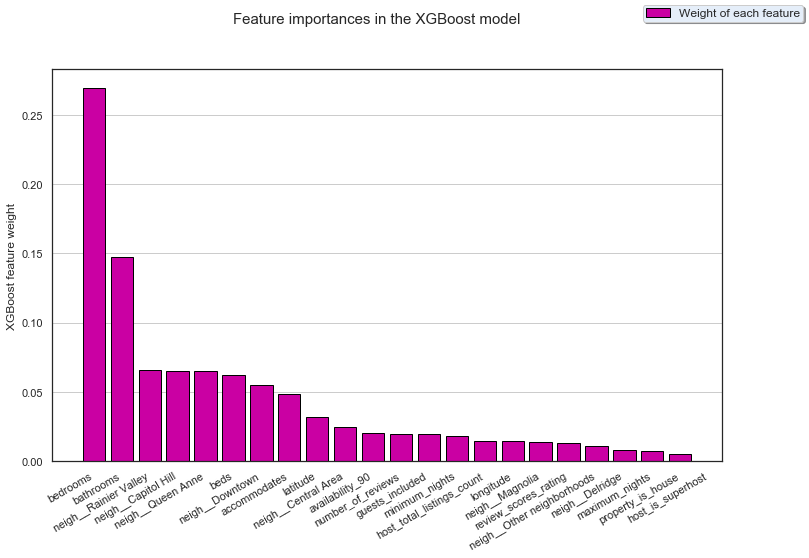

In [464]:
# variables (removing the ones that have 0 impact)
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg = ft_weights_xgb_reg[ft_weights_xgb_reg > 0]
ft_weights_xgb_reg.sort_values('weight', inplace=True, ascending=False)

# plot
fig, ax = plt.subplots(figsize=(12,8))
fig.suptitle("Feature importances in the XGBoost model", fontsize=15)

# bars
ax.bar(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, color='#ca00a3', edgecolor='black', label='Weight of each feature') 
ax.set_ylabel('XGBoost feature weight')
ax.grid(axis='y')


fig.legend(frameon=True, borderpad=0.25, fontsize='medium', facecolor='#e5eef9', fancybox=True, shadow=True)

# # fixing the xticks layout
fig.autofmt_xdate()
# plt.tight_layout()
plt.savefig('part3xgb')